<a href="https://colab.research.google.com/github/VarunKarthikjakkamputi14072/AI/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and packages

In [43]:
import numpy as np
import re
import nltk
import pickle
from nltk.corpus import stopwords
import pandas as pd
import warnings

# Data Exploration & Cleaning - 1

In [44]:
m_cols = ('class','text')

In [45]:
df= pd.read_csv("all-data.csv", names=m_cols , encoding='latin-1')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   4846 non-null   object
 1   text    4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [47]:
df.head()

,class,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [48]:
#df['label'] = df['Text Label'].map({'Non-Bullying': 0, 'Bullying': 1})
df['message'] = df['text']
#df.drop(['Text Label','Tweet'],axis=1,inplace=True)

# Visualization

<Axes: xlabel='class', ylabel='count'>

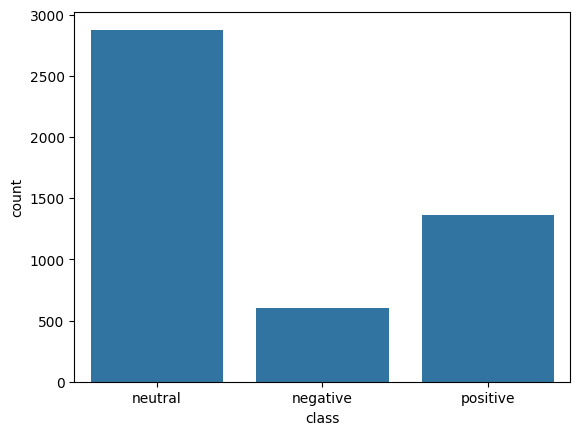

In [49]:
import seaborn as sns
sns.countplot(x="class", data = df)

In [50]:
!pip install wordcloud

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [52]:
comment_words = ''
stopwords = set(STOPWORDS)

In [53]:
for val in df.message:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

In [54]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

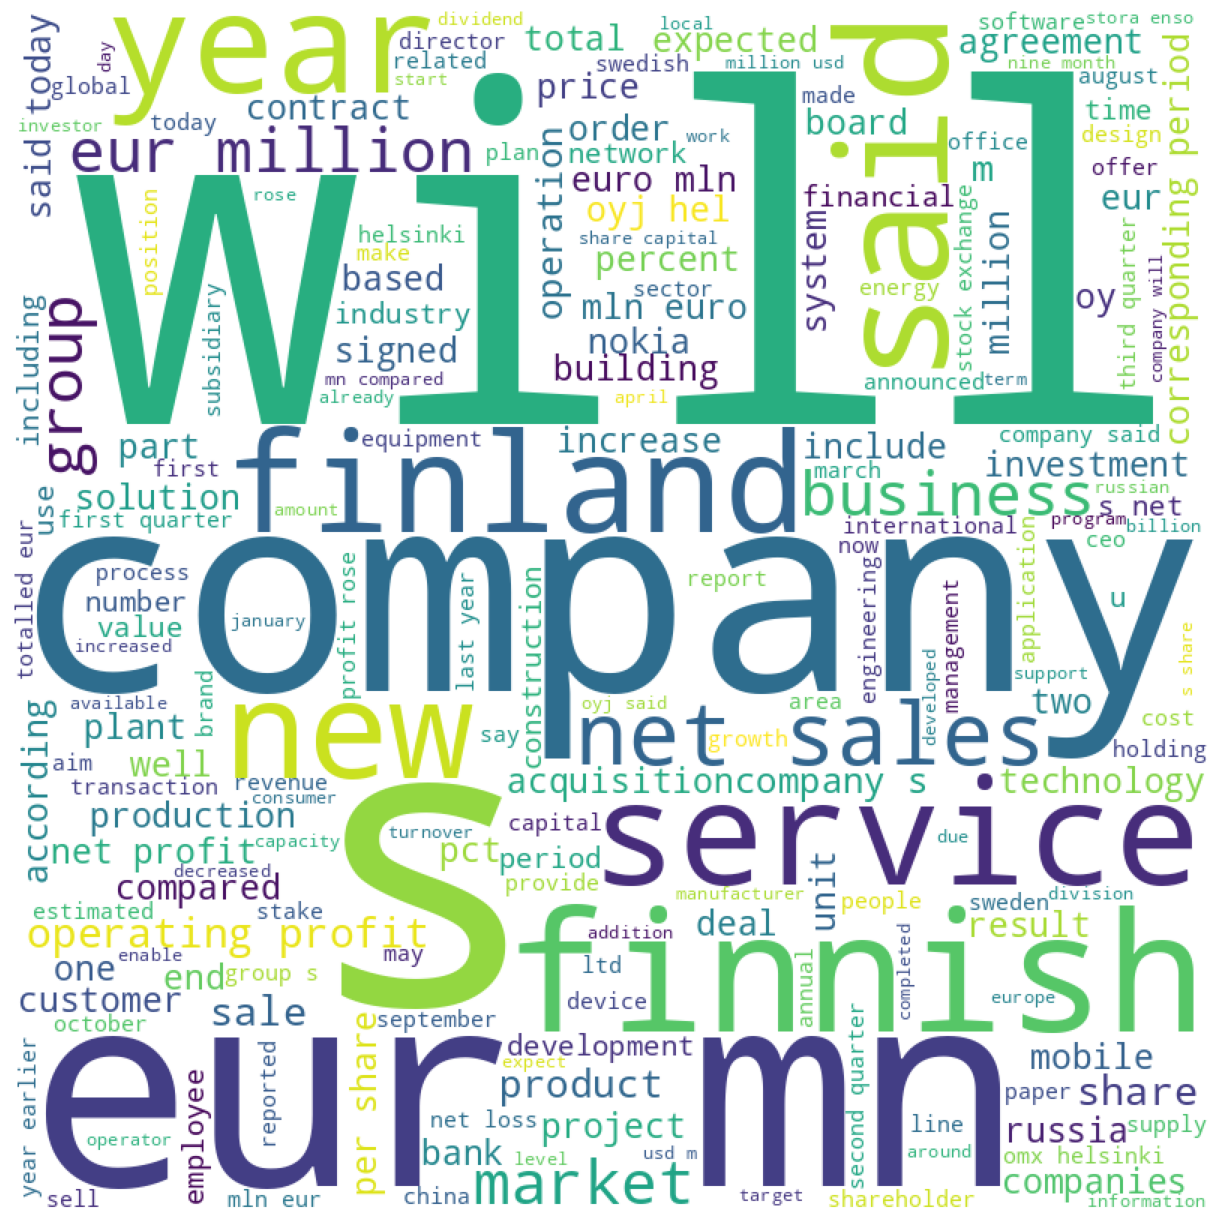

In [55]:
# plot the WordCloud image
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [56]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['class']= label_encoder.fit_transform(df['class'])
df['class'].unique()

array([1, 0, 2])

# Feature Selection - Formal DAta

In [57]:
df = df[0:1000]

In [58]:
X = df['message']
y = df['class']

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Vectorizing the Sentence

In [60]:
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data

# Splitting Data

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
print(X_test.shape)
print(y_test.shape)

(330, 3688)
(330,)


# Machine Learning

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
LogisticR = LogisticRegression()
LogisticR.fit(X_train, y_train)
y_pred = LogisticR.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
LR = accuracy_score(y_test, y_pred)

[[  4   0   7]
 [  1  19  43]
 [  1  12 243]]
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.61      0.30      0.40        63
           2       0.83      0.95      0.89       256

    accuracy                           0.81       330
   macro avg       0.70      0.54      0.59       330
weighted avg       0.78      0.81      0.78       330

0.806060606060606


# Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=10, random_state=0)
RandomForest.fit(X_train, y_train)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
RF = accuracy_score(y_test, y_pred)

[[  4   0   7]
 [  1  19  43]
 [  1  12 243]]
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.61      0.30      0.40        63
           2       0.83      0.95      0.89       256

    accuracy                           0.81       330
   macro avg       0.70      0.54      0.59       330
weighted avg       0.78      0.81      0.78       330

0.806060606060606


# AdaBoost Classifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
AdaBoost.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = AdaBoost.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
AB= accuracy_score(y_test, y_pred)

[[  3   0   8]
 [  0   6  57]
 [  7  13 236]]
              precision    recall  f1-score   support

           0       0.30      0.27      0.29        11
           1       0.32      0.10      0.15        63
           2       0.78      0.92      0.85       256

    accuracy                           0.74       330
   macro avg       0.47      0.43      0.43       330
weighted avg       0.68      0.74      0.69       330

0.7424242424242424


# SGD Classifier

In [67]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
SGD.fit(X_train, y_train)
SGDClassifier(max_iter=5)
y_pred = SGD.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
SGDA = accuracy_score(y_test, y_pred)

[[  3   2   6]
 [  1  25  37]
 [  4  18 234]]
              precision    recall  f1-score   support

           0       0.38      0.27      0.32        11
           1       0.56      0.40      0.46        63
           2       0.84      0.91      0.88       256

    accuracy                           0.79       330
   macro avg       0.59      0.53      0.55       330
weighted avg       0.77      0.79      0.78       330

0.793939393939394


# KNeighbors Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
KNNA = accuracy_score(y_test, y_pred)

[[  3   1   7]
 [  1  16  46]
 [  0  16 240]]
              precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.48      0.25      0.33        63
           2       0.82      0.94      0.87       256

    accuracy                           0.78       330
   macro avg       0.68      0.49      0.54       330
weighted avg       0.75      0.78      0.76       330

0.7848484848484848


# Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
DT = accuracy_score(y_test, y_pred)

[[  5   0   6]
 [  3  25  35]
 [  1  27 228]]
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.48      0.40      0.43        63
           2       0.85      0.89      0.87       256

    accuracy                           0.78       330
   macro avg       0.63      0.58      0.60       330
weighted avg       0.77      0.78      0.77       330

0.7818181818181819


# Multinomial Naive Bayes

In [70]:
from sklearn.naive_bayes import MultinomialNB
MultinomialNB = MultinomialNB()
MultinomialNB.fit(X_train, y_train)
y_pred = MultinomialNB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
MNB = accuracy_score(y_test, y_pred)

[[  0   2   9]
 [  0  20  43]
 [  0  25 231]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.43      0.32      0.36        63
           2       0.82      0.90      0.86       256

    accuracy                           0.76       330
   macro avg       0.41      0.41      0.41       330
weighted avg       0.71      0.76      0.73       330

0.7606060606060606


# Support Vector Machine

In [71]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
svm = accuracy_score(y_test, y_pred)

[[  0   0  11]
 [  0   0  63]
 [  0   0 256]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        63
           2       0.78      1.00      0.87       256

    accuracy                           0.78       330
   macro avg       0.26      0.33      0.29       330
weighted avg       0.60      0.78      0.68       330

0.7757575757575758


# Gradient Boosting Classifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
gbc = accuracy_score(y_test, y_pred)

[[  3   1   7]
 [  1  22  40]
 [  0  21 235]]
              precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.50      0.35      0.41        63
           2       0.83      0.92      0.87       256

    accuracy                           0.79       330
   macro avg       0.69      0.51      0.56       330
weighted avg       0.77      0.79      0.77       330

0.7878787878787878


# MLP Classifier

In [73]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=30)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
mlp = accuracy_score(y_test, y_pred)

[[  2   0   9]
 [  1  19  43]
 [  0  13 243]]
              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.59      0.30      0.40        63
           2       0.82      0.95      0.88       256

    accuracy                           0.80       330
   macro avg       0.69      0.48      0.52       330
weighted avg       0.77      0.80      0.77       330

0.8


# Voting Classifier

In [74]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.svm import SVC
seed = 7
kfold = model_selection.KFold(n_splits=10, shuffle=True)

estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
warnings.simplefilter("ignore")

print(ensemble)
ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E= accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('cart', RandomForestClassifier()),
                             ('svm', SVC())])
[[  4   0   7]
 [  1  13  49]
 [  1   1 254]]
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.93      0.21      0.34        63
           2       0.82      0.99      0.90       256

    accuracy                           0.82       330
   macro avg       0.80      0.52      0.57       330
weighted avg       0.84      0.82      0.78       330

0.8212121212121212


In [75]:
tweet_df = df[['text','class']]
#tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
X = tweet_df['text']
y = tweet_df['class']

In [76]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Getting required labels only and encoding

review_labels_train = y_train.factorize()

In [78]:
# Importing required tf modules
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab = X_train.values
# Vectorize a text corpus, by turning each text into sequence of integers

tokenizer = Tokenizer(num_words=8000,oov_token='OOV')
tokenizer.fit_on_texts(vocab)

vocab_size = len(tokenizer.word_index) + 1

print(tokenizer)
print(vocab_size)

3319


In [79]:
# Store and Padding Converted Sequences
tweet = X_train.values

tweet_seqs = tokenizer.texts_to_sequences(tweet)

padded_sequence_train = pad_sequences(tweet_seqs, maxlen=200)
print(padded_sequence_train)

[[   0    0    0 ...   28    3   85]
 [   0    0    0 ...    2 1443   61]
 [   0    0    0 ...   53    2 1446]
 ...
 [   0    0    0 ...   77   27 3316]
 [   0    0    0 ...  127 1178 3318]
 [   0    0    0 ...  110   49   12]]


# LSTM

In [80]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,
                                     input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           106208    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 122859 (479.92 KB)
Trainable params: 122859 (479.92 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [81]:
trained = model.fit(padded_sequence_train,review_labels_train[0],
                  validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
20/20 [==============================] - 35s 1s/step - loss: 0.6652 - accuracy: 0.7516 - val_loss: 0.5753 - val_accuracy: 0.8188
Epoch 2/20
20/20 [==============================] - 16s 786ms/step - loss: 0.5729 - accuracy: 0.7766 - val_loss: 0.5165 - val_accuracy: 0.8188
Epoch 3/20
20/20 [==============================] - 15s 732ms/step - loss: 0.5589 - accuracy: 0.7766 - val_loss: 0.5017 - val_accuracy: 0.8188
Epoch 4/20
20/20 [==============================] - 15s 766ms/step - loss: 0.5367 - accuracy: 0.7766 - val_loss: 0.5178 - val_accuracy: 0.8188
Epoch 5/20
20/20 [==============================] - 8s 357ms/step - loss: 0.4805 - accuracy: 0.7781 - val_loss: 0.4646 - val_accuracy: 0.8188
Epoch 6/20
20/20 [==============================] - 5s 227ms/step - loss: 0.3560 - accuracy: 0.8266 - val_loss: 0.4459 - val_accuracy: 0.8250
Epoch 7/20
20/20 [==============================] - 6s 307ms/step - loss: 0.2491 - accuracy: 0.9109 - val_loss: 0.4356 - val_accuracy: 0.7937
Epoch

In [82]:
encoded_docs = tokenizer.texts_to_sequences(X_test)
padded_sequence_test = pad_sequences(encoded_docs, maxlen=200)
print(padded_sequence_test)

sentiment_label_test = y_test.factorize()
sentiment_label_test[0]

[[   0    0    0 ...    6    1   74]
 [   0    0    0 ...  113   34   35]
 [   0    0    0 ...  176    5   13]
 ...
 [   0    0    0 ...  622   61   60]
 [   0    0    0 ...    5    2  213]
 [   0    0    0 ...    4 1726   58]]


array([0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

In [83]:
score = model.evaluate(padded_sequence_test,sentiment_label_test[0],verbose=0)
lstm_acc = score[1]
lstm_acc

0.23999999463558197

# CNN

In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [86]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,
                                     input_length=200))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [87]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           106208    
                                                                 
 conv1d (Conv1D)             (None, 193, 32)           8224      
                                                                 
 max_pooling1d (MaxPooling1  (None, 96, 32)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                30730     
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                      

In [88]:
trained = model.fit(padded_sequence_train,review_labels_train[0],
                  validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
20/20 [==============================] - 5s 51ms/step - loss: 0.6039 - accuracy: 0.7766 - val_loss: 0.5261 - val_accuracy: 0.8188
Epoch 2/5
20/20 [==============================] - 0s 24ms/step - loss: 0.5741 - accuracy: 0.7766 - val_loss: 0.5407 - val_accuracy: 0.8188
Epoch 3/5
20/20 [==============================] - 1s 26ms/step - loss: 0.5562 - accuracy: 0.7766 - val_loss: 0.5081 - val_accuracy: 0.8188
Epoch 4/5
20/20 [==============================] - 0s 25ms/step - loss: 0.5166 - accuracy: 0.7766 - val_loss: 0.4884 - val_accuracy: 0.8188
Epoch 5/5
20/20 [==============================] - 0s 24ms/step - loss: 0.3807 - accuracy: 0.8078 - val_loss: 0.4636 - val_accuracy: 0.8313


In [93]:
encoded_docs = tokenizer.texts_to_sequences(X_test)
padded_sequence_test = pad_sequences(encoded_docs, maxlen=200)
print(padded_sequence_test)

sentiment_label_test = y_test.factorize()
sentiment_label_test[0]
accuracies=[0.8060606060606061, 0.8060606060606061, 0.7393939393939394, 0.796969696969697, 0.7848484848484848, 0.7818181818181819, 0.7606060606060606, 0.7757575757575758, 0.8, 0.7878787878787878, 0.8121212121212121]


[[   0    0    0 ...    6    1   74]
 [   0    0    0 ...  113   34   35]
 [   0    0    0 ...  176    5   13]
 ...
 [   0    0    0 ...  622   61   60]
 [   0    0    0 ...    5    2  213]
 [   0    0    0 ...    4 1726   58]]


In [91]:
score = model.evaluate(padded_sequence_test,sentiment_label_test[0],verbose=0)
cnn_acc = score[1]
cnn_acc

0.17499999701976776

# Accuracy Comparsion

In [94]:
for i in range(0, len(accuracies)):
    accuracies[i] = accuracies[i]*100
    print(accuracies[i])

80.60606060606061
80.60606060606061
73.93939393939394
79.6969696969697
78.48484848484848
78.18181818181819
76.06060606060606
77.57575757575758
80.0
78.78787878787878
81.21212121212122


In [97]:
models = ['Logistic Regression' , 'Random Forest', 'AdaBoost Classifier', 'SGD Classifier', 'KNN', 'Decision Tree', 'MNB','SVM','MLP','Gradient Boosting','Voting Classifier']

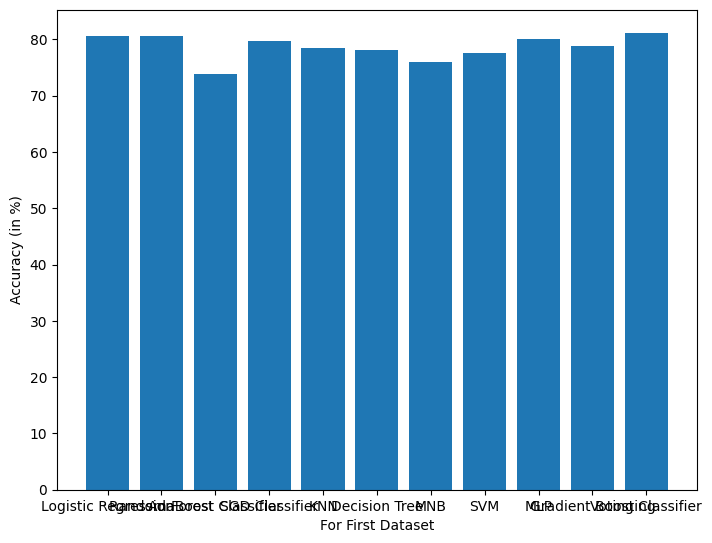

In [98]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models,accuracies)
plt.xlabel("For First Dataset")
plt.ylabel("Accuracy (in %)")
plt.show()

In [99]:
import pickle
pickle.dump(ensemble,open('model.pkl','wb'))